In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
class KNN:
    def __init__(self, n = 2):
        self.n = n
        self.history = {}

    def fit(self, data, n):
        self.n = n
        self.data = data

    def train(self, epochs = 1000):
        self.centroids = self._initialise_centroids()
        self.history["centroids"] = []

        for i in range(epochs):

            knn_sum = np.zeros(shape=(self.n, self.data.shape[1]))
            knn_count = np.zeros(shape=(self.n, 1))

            for x in self.data:
                dist = np.argmin(((self.centroids-x)**2).sum(axis=1))
                knn_sum[dist] = knn_sum[dist] + x
                knn_count[dist] += 1

            self.centroids = knn_sum/ (knn_count + 0.00001)
            if i%100 ==0 :
                self.history["centroids"].append(self.centroids)

    def _initialise_centroids(self):
        centroids = np.empty(shape=(self.n, self.data.shape[1]))
        for i in range(self.data.shape[1]):
            low = self.data[:,i].min()
            high = self.data[:,i].max()
            centroids[:,i] =  np.random.uniform(low=low, high=high, size=centroids[:,i].shape)

        return centroids
    
    def gethistory(self):
        return self.history

In [60]:
data = np.empty(shape=(50, 2))
data[:15, :] = np.random.uniform(low=0, high=15, size=(15, 2))
data[15:30, :] = np.random.uniform(low=15, high=30, size=(15, 2))
data[30:, :] = np.random.uniform(low=30, high=45, size=(20, 2))

In [61]:
data

array([[14.21525469, 11.50454083],
       [ 7.71288735,  4.17963408],
       [12.96817461,  2.29435869],
       [12.10321121,  3.05985705],
       [ 8.71616249,  0.71503838],
       [ 3.45582595, 13.16997349],
       [ 1.70933891, 14.11693798],
       [ 5.03292748,  2.91337998],
       [ 4.0203677 , 11.12547463],
       [10.40871444,  9.48348116],
       [12.72282525,  0.81559493],
       [ 7.40015307, 12.17070427],
       [ 6.26168464,  9.56173813],
       [ 4.60876392, 13.66061854],
       [ 0.67893655,  8.32134427],
       [24.54550636, 20.5069356 ],
       [15.22043632, 22.67127743],
       [24.13241657, 25.16640303],
       [19.11573584, 19.96676782],
       [26.84562587, 22.46713004],
       [21.99265658, 28.28004085],
       [19.80498599, 27.9637427 ],
       [28.74413306, 15.05007112],
       [24.96127337, 16.44598568],
       [22.08132658, 22.43678798],
       [29.249118  , 19.63484738],
       [15.32685153, 20.900211  ],
       [25.18944409, 25.84951062],
       [28.26464095,

In [62]:
clf = KNN()
clf.fit(data, 3)

In [63]:
clf.train(2000)

In [64]:
clf.gethistory()["centroids"]

[array([[12.64418544,  8.47271675],
        [34.16302084, 33.07863251],
        [ 8.10317823, 16.49117689]]),
 array([[ 7.46767691,  7.80617322],
        [37.98413491, 37.50972289],
        [23.21529678, 22.27119494]]),
 array([[ 7.46767691,  7.80617322],
        [37.98413491, 37.50972289],
        [23.21529678, 22.27119494]]),
 array([[ 7.46767691,  7.80617322],
        [37.98413491, 37.50972289],
        [23.21529678, 22.27119494]]),
 array([[ 7.46767691,  7.80617322],
        [37.98413491, 37.50972289],
        [23.21529678, 22.27119494]]),
 array([[ 7.46767691,  7.80617322],
        [37.98413491, 37.50972289],
        [23.21529678, 22.27119494]]),
 array([[ 7.46767691,  7.80617322],
        [37.98413491, 37.50972289],
        [23.21529678, 22.27119494]]),
 array([[ 7.46767691,  7.80617322],
        [37.98413491, 37.50972289],
        [23.21529678, 22.27119494]]),
 array([[ 7.46767691,  7.80617322],
        [37.98413491, 37.50972289],
        [23.21529678, 22.27119494]]),
 array([[ 

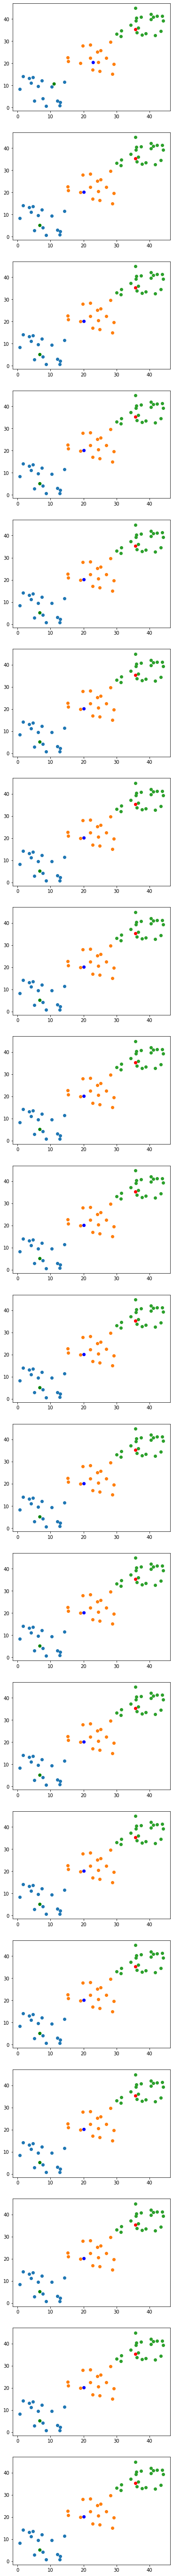

In [65]:

marker_color = ["b", "g", "r"]
fig, axs = plt.subplots(len(centroids))
fig.set_figheight(100)
for i in range(len(centroids)):
    axs[i].scatter(data[:15,0], data[:15,1])
    axs[i].scatter(data[15:30,0], data[15:30,1])
    axs[i].scatter(data[30:,0], data[30:,1])
    axs[i].scatter(centroids[i][:, 0], centroids[i][:, 1], c = marker_color)
plt.show()

In [73]:
#separate data by centroids
results = centroids[-1]
labels = np.empty(shape=(3,10,2))
for i, x in enumerate(data):
    index = np.argmin(((results-x)**2).sum(axis=1))
    labels[index].append(data[i])

AttributeError: 'numpy.ndarray' object has no attribute 'append'

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
